__Author:__ Salem Abuammer

## Data Collection<br>
Gather the 2000 tweets for each of the candidates and take only the oldest 1000 tweets. This is to make sure that the number of retweets for those tweets has stabilized, since our classifier is going to perform binary classification of high reach vs low reach based on the number of retweets of a tweet.

In [0]:
from TwitterAPI import TwitterAPI
import pickle

In [0]:
# Twitter Credentials
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

# IBM Cloud Credentials
api_key = ''
service_url = ''

In [0]:
# Convenience functions for collecting data from twitter

def get_twitter():
    """ Construct an instance of TwitterAPI using the tokens you entered above.
    Returns:
      An instance of TwitterAPI.
    """
    return TwitterAPI(consumer_key, consumer_secret, access_token, access_token_secret)

def robust_request(twitter, resource, params, max_tries=5):
    """ If a Twitter request fails, sleep for 15 minutes.
    Do this at most max_tries times before quitting.
    Args:
      twitter .... A TwitterAPI object.
      resource ... A resource string to request; e.g., "friends/ids"
      params ..... A parameter dict for the request, e.g., to specify
                   parameters like screen_name or count.
      max_tries .. The maximum number of tries to attempt.
    Returns:
      A TwitterResponse object, or None if failed.
    """
    for i in range(max_tries):
        request = twitter.request(resource, params)
        if request.status_code == 200:
            return request
        else:
            print('Got error %s \nsleeping for 15 minutes.' % request.text)
            sys.stderr.flush()
            time.sleep(61 * 15)
            
def get_timeline_for_candidate(twitter, limit, candidate_name):
    tweets = []
    initial_response = robust_request(twitter, 'statuses/user_timeline', 
                          {'screen_name': candidate_name, 
                           'count': limit, 
                           'include_rts': False,
                           'tweet_mode': 'extended'})
    tweets.extend([tweet for tweet in initial_response])
    if len(tweets) >= limit:
        return tweets
    
    # We subtract 1 in order to not get redundant tweets on the next request
    min_id = min([tweet['id'] for tweet in initial_response]) - 1
    while True:
        response = robust_request(twitter, 'statuses/user_timeline', 
                                            {'screen_name': candidate_name, 
                                             'max_id': min_id, 
                                             'include_rts': False,
                                             'tweet_mode': 'extended'})
        tweets.extend([tweet for tweet in response])
        print(f'Number of tweets found so far: {len(tweets)}')
        if len(tweets) >= limit:
            return tweets
        min_id = min([tweet['id'] for tweet in response]) - 1

In [0]:
twitter = get_twitter()

In [0]:
warren_tweets = get_timeline_for_candidate(twitter, 2000, 'SenWarren')

Number of tweets found so far: 194
Number of tweets found so far: 209
Number of tweets found so far: 224
Number of tweets found so far: 238
Number of tweets found so far: 256
Number of tweets found so far: 276
Number of tweets found so far: 292
Number of tweets found so far: 300
Number of tweets found so far: 320
Number of tweets found so far: 336
Number of tweets found so far: 352
Number of tweets found so far: 369
Number of tweets found so far: 385
Number of tweets found so far: 399
Number of tweets found so far: 417
Number of tweets found so far: 435
Number of tweets found so far: 454
Number of tweets found so far: 473
Number of tweets found so far: 491
Number of tweets found so far: 507
Number of tweets found so far: 519
Number of tweets found so far: 529
Number of tweets found so far: 549
Number of tweets found so far: 567
Number of tweets found so far: 585
Number of tweets found so far: 604
Number of tweets found so far: 623
Number of tweets found so far: 641
Number of tweets fou

In [0]:
biden_tweets = get_timeline_for_candidate(twitter, 2000, 'JoeBiden')

Number of tweets found so far: 217
Number of tweets found so far: 237
Number of tweets found so far: 257
Number of tweets found so far: 276
Number of tweets found so far: 296
Number of tweets found so far: 316
Number of tweets found so far: 336
Number of tweets found so far: 355
Number of tweets found so far: 375
Number of tweets found so far: 394
Number of tweets found so far: 413
Number of tweets found so far: 433
Number of tweets found so far: 453
Number of tweets found so far: 473
Number of tweets found so far: 493
Number of tweets found so far: 513
Number of tweets found so far: 533
Number of tweets found so far: 553
Number of tweets found so far: 573
Number of tweets found so far: 593
Number of tweets found so far: 613
Number of tweets found so far: 633
Number of tweets found so far: 653
Number of tweets found so far: 673
Number of tweets found so far: 692
Number of tweets found so far: 712
Number of tweets found so far: 732
Number of tweets found so far: 752
Number of tweets fou

In [0]:
bernie_tweets = get_timeline_for_candidate(twitter, 2000, 'BernieSanders')

Number of tweets found so far: 158
Number of tweets found so far: 172
Number of tweets found so far: 181
Number of tweets found so far: 192
Number of tweets found so far: 204
Number of tweets found so far: 216
Number of tweets found so far: 224
Number of tweets found so far: 229
Number of tweets found so far: 246
Number of tweets found so far: 266
Number of tweets found so far: 279
Number of tweets found so far: 296
Number of tweets found so far: 314
Number of tweets found so far: 331
Number of tweets found so far: 349
Number of tweets found so far: 363
Number of tweets found so far: 375
Number of tweets found so far: 383
Number of tweets found so far: 399
Number of tweets found so far: 406
Number of tweets found so far: 416
Number of tweets found so far: 434
Number of tweets found so far: 448
Number of tweets found so far: 465
Number of tweets found so far: 481
Number of tweets found so far: 496
Number of tweets found so far: 509
Number of tweets found so far: 523
Number of tweets fou

In [0]:
yang_tweets = get_timeline_for_candidate(twitter, 2000, 'AndrewYang')

Number of tweets found so far: 130
Number of tweets found so far: 135
Number of tweets found so far: 146
Number of tweets found so far: 151
Number of tweets found so far: 161
Number of tweets found so far: 176
Number of tweets found so far: 188
Number of tweets found so far: 204
Number of tweets found so far: 215
Number of tweets found so far: 231
Number of tweets found so far: 244
Number of tweets found so far: 256
Number of tweets found so far: 269
Number of tweets found so far: 281
Number of tweets found so far: 284
Number of tweets found so far: 293
Number of tweets found so far: 303
Number of tweets found so far: 316
Number of tweets found so far: 327
Number of tweets found so far: 339
Number of tweets found so far: 351
Number of tweets found so far: 363
Number of tweets found so far: 377
Number of tweets found so far: 387
Number of tweets found so far: 397
Number of tweets found so far: 406
Number of tweets found so far: 418
Number of tweets found so far: 428
Number of tweets fou

## Data Analysis<br>
Now that we've collected the data, we'll perform some basic data analysis to see the number of retweets for each candidate that seems to correspond with high reach. To do this, we simply plot a histogram of the number of retweets of the tweets of the candidates. We expect these histograms to be long-tailed, since there are usually a smaller number of really high reach tweets and a much larger number of low reach tweets. Also, we only take the oldest 1000 tweets of each of the candidates, since the more recent tweets are still in the immediate attention of the public, which means the retweets for those tweets are bound to fluctuate.

In [0]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

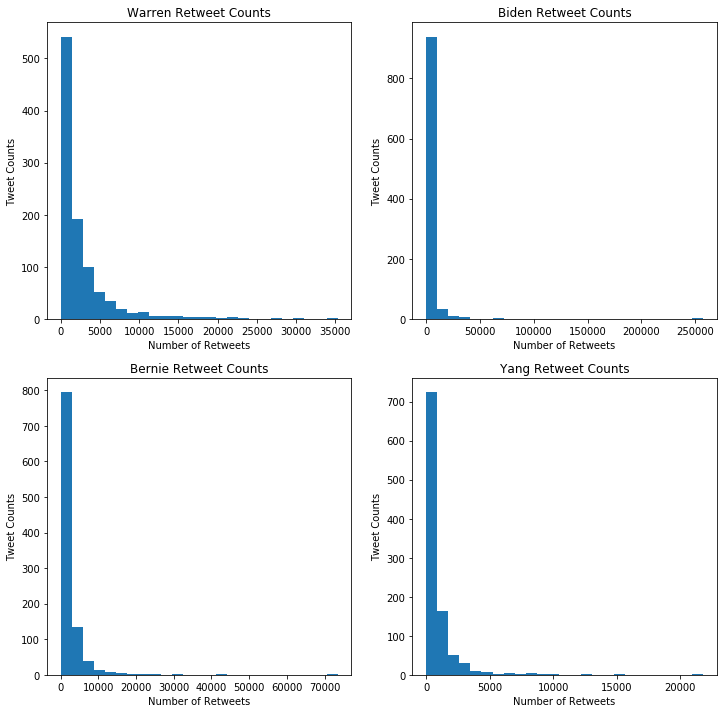

In [0]:
warren_tweets_1000 = warren_tweets[1000:2000]
biden_tweets_1000 = biden_tweets[1000:2000]
bernie_tweets_1000 = bernie_tweets[1000:2000]
yang_tweets_1000 = yang_tweets[1000:2000]

num_retweets_warren = np.array([warren_tweets_1000[i]['retweet_count']
                                for i in range(len(warren_tweets_1000))])
num_retweets_biden = np.array([biden_tweets_1000[i]['retweet_count']
                               for i in range(len(biden_tweets_1000))])
num_retweets_bernie = np.array([bernie_tweets_1000[i]['retweet_count']
                               for i in range(len(bernie_tweets_1000))])
num_retweets_yang = np.array([yang_tweets_1000[i]['retweet_count']
                             for i in range(len(yang_tweets_1000))])

n_bins = 25
fig, axs = plt.subplots(2,2, figsize=(12,12))

# Plot Warren's subplot
axs[0, 0].hist(num_retweets_warren, bins=n_bins)
axs[0, 0].set_title('Warren Retweet Counts')

axs[0, 1].hist(num_retweets_biden, bins=n_bins)
axs[0, 1].set_title('Biden Retweet Counts')

axs[1, 0].hist(num_retweets_bernie, bins=n_bins)
axs[1, 0].set_title('Bernie Retweet Counts')

axs[1, 1].hist(num_retweets_yang, bins=n_bins)
axs[1, 1].set_title('Yang Retweet Counts')

for ax in axs.flat:
    ax.set(xlabel='Number of Retweets', ylabel='Tweet Counts')

plt.show()

From the above graph, we can conclude that over 5000 retweets for a tweet of Senator Warren is considered high reach, over 7500 retweets is considered high reach for Bernie, over 15000 retweets is considered high reach for Biden, and over 2500 retweets is considered high reach for Yang. (These are all estimates obtained by looking at the "elbow" points of each of the respective graphs to see where the long-tail distribution begins).

## More Data Analysis

In [0]:
num_retweets_warren = np.array([warren_tweets[i]['retweet_count']
                                for i in range(len(warren_tweets))])
num_retweets_biden = np.array([biden_tweets[i]['retweet_count']
                               for i in range(len(biden_tweets))])
num_retweets_bernie = np.array([bernie_tweets[i]['retweet_count']
                               for i in range(len(bernie_tweets))])
num_retweets_yang = np.array([yang_tweets[i]['retweet_count']
                             for i in range(len(yang_tweets))])

In [0]:
import scipy.stats as stats

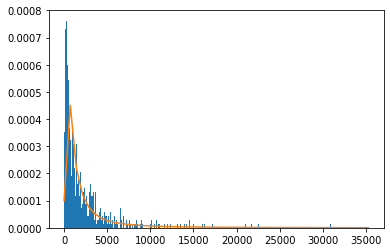

In [0]:
# Estimate parameters of inverse gamma dist
sorted_warren_counts = sorted(num_retweets_warren, reverse=True)
shape, loc, scale = stats.invgamma.fit(sorted_warren_counts)
rv = stats.invgamma(shape, loc, scale)

# Freedman–Diaconis rule for histogram bin selection
iqr = stats.iqr(sorted_warren_counts)
num_bins = int((2 * iqr) // np.cbrt(len(sorted_warren_counts)))

x = np.linspace(0, max(sorted_warren_counts))
plt.hist(sorted_warren_counts, bins=num_bins, density=True)
plt.plot(x, rv.pdf(x))
plt.show()

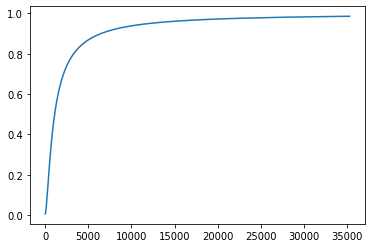

In [0]:
plt.plot(sorted_warren_counts, 
         stats.invgamma.cdf(sorted(num_retweets_warren, reverse=True), shape, loc=loc, scale=scale))

In [0]:
for i, j in zip(sorted_warren_counts, stats.invgamma.cdf(sorted_warren_counts, shape, loc=loc, scale=scale)):
    print(i, j)

35292 0.9862786611836131
30923 0.9847682575777653
27668 0.9833696940960818
23632 0.981165672450459
23186 0.9808804162515167
22552 0.9804576482343748
21769 0.9799053303147812
21702 0.9798564217205745
21040 0.979358286662431
20386 0.978837956270716
19737 0.9782913362716749
19559 0.978135778726814
19356 0.9779552658561682
18436 0.9770929691098656
17705 0.9763511965883496
17556 0.9761932677943183
17190 0.9757950092745454
17026 0.9756116176423394
16302 0.9747629063058231
16027 0.9744227096247051
15858 0.9742084435505699
15775 0.974101718192056
15000 0.9730546934118215
14519 0.9723550965542633
14509 0.97234011494986
14248 0.971942494161202
14159 0.9718039318078219
13987 0.9715317132016461
13924 0.97143051116046
13510 0.9707446591376299
13204 0.9702132412351446
13152 0.9701207543509901
12435 0.9687757898332442
12350 0.9686071779331991
12067 0.9680306375780621
11981 0.967850653398083
11670 0.9671801823260231
11554 0.9669219198380065
11271 0.9662721136053807
11050 0.9657441975578706
10964 0.965

193 0.4380954562729258
193 0.4380954562729258
191 0.43546608144543086
185 0.42741840587822044
185 0.42741840587822044
181 0.421916530037452
178 0.41771610191194
177 0.4163015925401402
176 0.41487981490400383
175 0.4134507174923704
174 0.4120142484263555
173 0.41057035545952303
173 0.41057035545952303
171 0.4076600870020435
171 0.4076600870020435
170 0.40619360518454606
168 0.4032376778146072
167 0.4017481237473983
165 0.398745560848044
163 0.39571135540528635
160 0.391099735052841
157 0.3864143718181289
155 0.3832490565495049
154 0.3816537011485288
153 0.3800498016681436
153 0.3800498016681436
153 0.3800498016681436
150 0.37518624152797825
147 0.37024362210393125
146 0.3685782293980065
144 0.3652202956361386
143 0.3635276306982985
141 0.3601145932555928
141 0.3601145932555928
141 0.3601145932555928
140 0.35839409551775636
140 0.35839409551775636
136 0.3514174411132434
130 0.3406614851762828
128 0.33699653129333
124 0.3295441015155679
123 0.3276550965815116
123 0.3276550965815116
116 0.

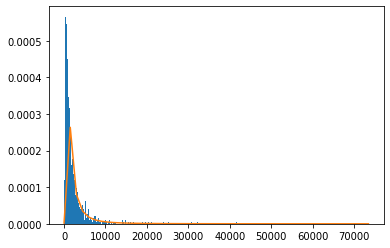

In [0]:
# Estimate parameters of inverse gamma dist
sorted_counts_bernie = sorted(num_retweets_bernie, reverse=True)
shape, loc, scale = stats.invgamma.fit(sorted_counts_bernie)
rv = stats.invgamma(shape, loc, scale)

# Freedman–Diaconis rule for histogram bin selection
iqr = stats.iqr(sorted_counts_bernie)
num_bins = int((2 * iqr) // np.cbrt(len(sorted_counts_bernie)))

x = np.linspace(0, max(sorted_counts_bernie))
plt.hist(num_retweets_bernie, bins=num_bins, density=True)
plt.plot(x, rv.pdf(x))
plt.show()

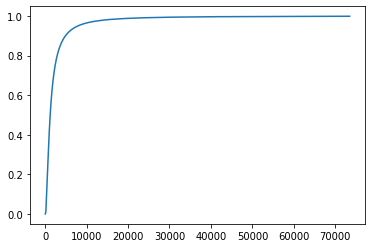

In [0]:
plt.plot(sorted_counts_bernie, 
stats.invgamma.cdf(sorted_counts_bernie, shape, loc=loc, scale=scale))

In [0]:
for i, j in zip(sorted_counts_bernie, stats.invgamma.cdf(sorted_counts_bernie, shape, loc=loc, scale=scale)):
    print(i, j)

73461 0.9923177746416495
41620 0.9879560752449212
32069 0.9851999294083683
30753 0.9847017796576183
25164 0.9820764745988262
23965 0.9813724706471928
21163 0.9794529399914796
20440 0.978882042089921
19651 0.9782164927149642
19068 0.9776933034086734
16720 0.9752608900190618
16125 0.9745451269824701
15519 0.9737661547723722
14858 0.9728523507622943
14730 0.9726669881950147
14415 0.9721983852855532
14104 0.971717526906149
13930 0.971440184486712
12469 0.9688426630681766
12343 0.9685932004224086
12062 0.968020235741499
11908 0.9676960676593882
11492 0.9667819883539048
11391 0.9665511454314901
11329 0.9664076333849458
10988 0.965592717139379
10949 0.9654966523799131
10745 0.9649841043938376
10339 0.9639109045688299
10071 0.9631606405419597
10012 0.9629907006598695
9968 0.9628628070815971
9736 0.9621715703455725
9594 0.9617339184394141
9236 0.9605778800020283
8748 0.9588680565867616
8612 0.9583611329994136
8308 0.9571751760345398
8175 0.956631891074666
8147 0.9565155215387442
8097 0.95630595

341 0.5793187883599542
339 0.5779232090951357
338 0.5772215619640806
338 0.5772215619640806
336 0.5758104804854021
335 0.5751010169305967
334 0.5743889185143438
334 0.5743889185143438
332 0.5729567574892032
332 0.5729567574892032
332 0.5729567574892032
332 0.5729567574892032
331 0.5722366647999128
331 0.5722366647999128
331 0.5722366647999128
325 0.5678589729105981
324 0.5671196892848378
314 0.5595698905856474
314 0.5595698905856474
313 0.5587988470888728
310 0.5564677116380686
301 0.5493080612025386
300 0.548496752112009
299 0.5476822151175025
298 0.5468644308426516
295 0.5443913983060116
294 0.5435604281147013
292 0.5418884280883031
290 0.5402028790718276
290 0.5402028790718276
290 0.5402028790718276
289 0.5393549720415431
286 0.5367904690268533
285 0.5359286364599214
284 0.5350632688980586
282 0.5333218414824571
281 0.5324457375426588
280 0.5315660104326696
280 0.5315660104326696
279 0.5306826376698499
278 0.5297955965928413
278 0.5297955965928413
274 0.5262102895694961
272 0.524395

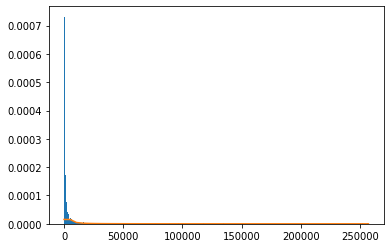

In [0]:
# Estimate parameters of inverse gamma dist
sorted_biden_counts = sorted(num_retweets_biden, reverse=True)
shape, loc, scale = stats.invgamma.fit(sorted_biden_counts)
rv = stats.invgamma(shape, loc, scale)

# Freedman–Diaconis rule for histogram bin selection
iqr = stats.iqr(sorted_biden_counts)
num_bins = int((2 * iqr) // np.cbrt(len(sorted_biden_counts)))

x = np.linspace(0, max(sorted_biden_counts))
plt.hist(sorted_biden_counts, bins=num_bins, density=True)
plt.plot(x, rv.pdf(x))
plt.show()

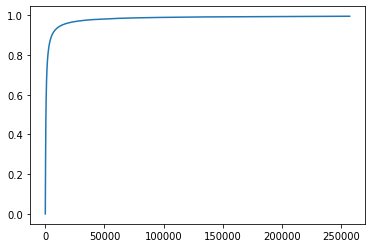

In [0]:
plt.plot(sorted_biden_counts, 
stats.invgamma.cdf(sorted_biden_counts, shape, loc=loc, scale=scale))

In [0]:
for i, j in zip(sorted_biden_counts, stats.invgamma.cdf(sorted_biden_counts, shape, loc=loc, scale=scale)):
    print(i, j)

257083 0.9971530734336093
251704 0.9971049428136427
144512 0.9955054290205875
134699 0.995247836269639
117424 0.9947018198984198
96096 0.9937899242236424
88847 0.9933918548857998
76884 0.9925899025466148
70364 0.9920512384789372
68265 0.9918583316279392
62159 0.9912313906361381
44324 0.9885409842912366
40981 0.9878078056381342
40386 0.9876659808616025
37517 0.9869260194118776
37433 0.9869028313360342
33832 0.9858127577704441
29243 0.9840811266284161
29234 0.984077256076239
28910 0.983936484552293
27740 0.9834037867713243
27482 0.9832808838292115
24990 0.9819780516034013
24267 0.98155563424691
24164 0.9814936234664474
22924 0.9807082361027901
21581 0.9797674087336747
19642 0.9782086265085611
19551 0.9781287281457162
19358 0.9779570607513127
19182 0.9777978345928169
19125 0.9777457077452951
18000 0.9766569978981267
17147 0.9757472269226164
17080 0.9756723487649429
17055 0.9756442750529809
16967 0.9755448701225922
16937 0.9755107720309107
16596 0.9751154922122739
15918 0.974284977640596
1

103 0.287591076828356
103 0.287591076828356
103 0.287591076828356
103 0.287591076828356
103 0.287591076828356
102 0.28546915472703466
102 0.28546915472703466
102 0.28546915472703466
101 0.2833355281883073
98 0.276863950948248
96 0.272490208256639
96 0.272490208256639
94 0.268068598772783
94 0.268068598772783
93 0.26583975193801856
93 0.26583975193801856
93 0.26583975193801856
93 0.26583975193801856
92 0.26359883233091636
91 0.2613458093823946
89 0.2568033440066989
88 0.25451385370343405
88 0.25451385370343405
87 0.25221216461588764
86 0.24989826036563026
83 0.24288314386643695
82 0.24052028450389576
82 0.24052028450389576
82 0.24052028450389576
79 0.23335827653663338
78 0.2309465009038911
77 0.22852253603004122
75 0.22363814864358458
75 0.22363814864358458
75 0.22363814864358458
75 0.22363814864358458
73 0.2187053918805397
72 0.21622098833114636
72 0.21622098833114636
72 0.21622098833114636
72 0.21622098833114636
71 0.2137246416206605
68 0.20616462044070688
66 0.20106627064140947
65 0.

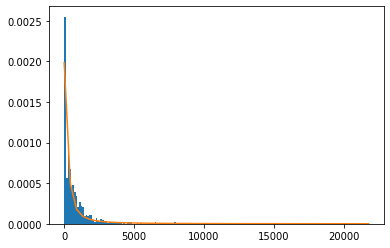

In [0]:
# Estimate parameters of inverse gamma dist
sorted_yang_counts = sorted(num_retweets_yang, reverse=True)
shape, loc, scale = stats.invgamma.fit(sorted_yang_counts)
rv = stats.invgamma(shape, loc, scale)

# Freedman–Diaconis rule for histogram bin selection
iqr = stats.iqr(sorted_yang_counts)
num_bins = int((2 * iqr) // np.cbrt(len(sorted_yang_counts)))

x = np.linspace(0, max(sorted_yang_counts))
plt.hist(sorted_yang_counts, bins=num_bins, density=True)
plt.plot(x, rv.pdf(x))
plt.show()

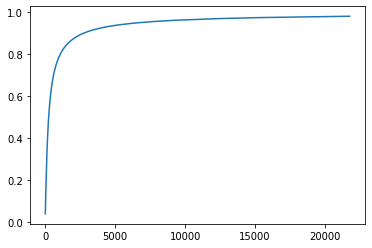

In [0]:
plt.plot(sorted_yang_counts, 
stats.invgamma.cdf(sorted_yang_counts, shape, loc=loc, scale=scale))

In [0]:
for i, j in zip(sorted_yang_counts, stats.invgamma.cdf(sorted_yang_counts, shape, loc=loc, scale=scale)):
    print(i, j)

21768 0.9799046023088968
15284 0.9734493328588719
12403 0.9687125531584138
9787 0.962326009385929
9307 0.9608133986974138
8249 0.9569360789806727
8236 0.9568829900871176
7982 0.9558151620287019
7941 0.955637153762036
7773 0.9548904822034638
7263 0.9524383703053543
6828 0.9500937717723358
6578 0.9486234644099696
6558 0.9485015871006954
6108 0.9455749571366994
5498 0.9409440904129173
5225 0.9385672409772773
4818 0.9345901319517474
4748 0.9338463381696404
4671 0.933005731737418
4670 0.9329946557461308
4513 0.9312027721494047
4352 0.9292487215596231
4341 0.9291106147778397
4096 0.925868140076985
4078 0.9256165931420335
4006 0.9245907938771258
3962 0.9239479989556867
3862 0.9224399344123348
3752 0.9207008009655887
3750 0.9206683625096838
3631 0.9186827015998498
3589 0.9179547188553808
3471 0.9158281406738252
3436 0.9151731464866958
3426 0.9149838823827873
3353 0.9135727701316384
3301 0.9125348069003202
3288 0.9122708936616235
3277 0.9120461720939277
3262 0.9117376278009128
3148 0.9093101351

14 0.0600580100269164
14 0.0600580100269164
14 0.0600580100269164
14 0.0600580100269164
14 0.0600580100269164
14 0.0600580100269164
14 0.0600580100269164
13 0.05751009268990202
13 0.05751009268990202
13 0.05751009268990202
13 0.05751009268990202
13 0.05751009268990202
13 0.05751009268990202
13 0.05751009268990202
13 0.05751009268990202
13 0.05751009268990202
13 0.05751009268990202
13 0.05751009268990202
13 0.05751009268990202
13 0.05751009268990202
13 0.05751009268990202
12 0.05499028467962563
12 0.05499028467962563
12 0.05499028467962563
12 0.05499028467962563
12 0.05499028467962563
12 0.05499028467962563
12 0.05499028467962563
12 0.05499028467962563
12 0.05499028467962563
12 0.05499028467962563
12 0.05499028467962563
12 0.05499028467962563
12 0.05499028467962563
11 0.05250055432268121
11 0.05250055432268121
11 0.05250055432268121
11 0.05250055432268121
11 0.05250055432268121
11 0.05250055432268121
11 0.05250055432268121
11 0.05250055432268121
11 0.05250055432268121
11 0.0525005543226

In [0]:
# Save the older 1000 tweets of each candidate to their respective pickle files
pickle.dump(warren_tweets_1000, open('warren_tweets_old_1000.p', 'wb'))
pickle.dump(biden_tweets_1000, open('biden_tweets_old_1000.p', 'wb'))
pickle.dump(bernie_tweets_1000, open('bernie_tweets_old_1000.p', 'wb'))
pickle.dump(yang_tweets_1000, open('yang_tweets_old_1000.p', 'wb'))

# Save the newer 1000 tweets of each candidate to separate pickle files 
# (just in case we use them for tests)
pickle.dump(warren_tweets[:1000], open('warren_tweets_new_1000.p', 'wb'))
pickle.dump(biden_tweets[:1000], open('biden_tweets_new_1000.p', 'wb'))
pickle.dump(bernie_tweets[:1000], open('bernie_tweets_new_1000.p', 'wb'))
pickle.dump(yang_tweets[:1000], open('yang_tweets_new_1000.p', 'wb'))

## Sentiment Analysis Test<br>
Load the tweets for each of the candidates and perform sentiment analysis

In [1]:
import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize

import json
from ibm_watson import NaturalLanguageUnderstandingV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
from ibm_watson.natural_language_understanding_v1 import Features, EmotionOptions, SentimentOptions, KeywordsOptions

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


ModuleNotFoundError: ignored

In [0]:
warren_tweets = pickle.load(open('./Cand Tweets (Older)/warren_tweets_old_1000.p', 'rb'))
biden_tweets = pickle.load(open('./Cand Tweets (Older)/biden_tweets_old_1000.p', 'rb'))
bernie_tweets = pickle.load(open('./Cand Tweets (Older)/bernie_tweets_old_1000.p', 'rb'))
yang_tweets = pickle.load(open('./Cand Tweets (Older)/yang_tweets_old_1000.p', 'rb'))

In [0]:
# Test NLTK sentiment analysis capabilities
warren_tweet_text = [tweet['full_text'] for tweet in warren_tweets]
warren_polarity_scores = {}
sid = SentimentIntensityAnalyzer()
for tweet_text in warren_tweet_text:
    ss = sid.polarity_scores(tweet_text)
    warren_polarity_scores[tweet_text] = ss

In [0]:
# Test IBM Watson sentiment analysis capabilities
authenticator = IAMAuthenticator(api_key)
natural_language_understanding = NaturalLanguageUnderstandingV1(
    version='2019-07-12',
    authenticator=authenticator
)

natural_language_understanding.set_service_url(service_url)

In [0]:
result = natural_language_understanding.analyze(text=warren_tweet_text[0], features=Features(
    emotion=EmotionOptions(), sentiment=SentimentOptions(), keywords=KeywordsOptions()))

In [0]:
warren_tweet_text[0]

'.@realDonaldTrump said his steel tariffs would help the US steel industry. Instead, @CommerceGov gave hundreds of exemptions to subsidiaries of Chinese &amp; Japanese companies. Charging American firms more while foreign companies skate by is just plain wrong. https://t.co/Ud1koloqEd'

In [0]:
warren_polarity_scores[warren_tweet_text[0]]

{'neg': 0.074, 'neu': 0.861, 'pos': 0.065, 'compound': -0.1027}

In [0]:
result.get_result()

{'usage': {'text_units': 1, 'text_characters': 284, 'features': 3},
 'sentiment': {'document': {'score': -0.918284, 'label': 'negative'}},
 'language': 'en',
 'keywords': [{'text': 'American firms', 'relevance': 0.753111, 'count': 1},
  {'text': 'Japanese companies', 'relevance': 0.740325, 'count': 1},
  {'text': 'steel tariffs', 'relevance': 0.73366, 'count': 1},
  {'text': 'foreign companies skate', 'relevance': 0.588377, 'count': 1},
  {'text': 'US steel industry', 'relevance': 0.572763, 'count': 1},
  {'text': 'exemptions', 'relevance': 0.557948, 'count': 1},
  {'text': 'subsidiaries', 'relevance': 0.551642, 'count': 1},
  {'text': 'amp', 'relevance': 0.535194, 'count': 1},
  {'text': '@CommerceGov', 'relevance': 0.427779, 'count': 1},
  {'text': '@realDonaldTrump', 'relevance': 0.394168, 'count': 1}],
 'emotion': {'document': {'emotion': {'sadness': 0.613848,
    'joy': 0.031752,
    'fear': 0.044859,
    'disgust': 0.169792,
    'anger': 0.281753}}}}

From the results, we see that IBM Watson NLP seems to be more accurate with the sentiment of the tweets, which means it's a good idea to use that API over NLTK.

## Full Sentiment Analysis

In [0]:
import pickle

In [0]:
def sentiment_analysis(tweets_list, nlu):
    """
    Args:
      tweets_list .... The plain text list of tweets for a candidate
      nlu ... The natural language understanding tool from IBM Watson
    Returns:
      A python dictionary mapping the tweet text to all of the sentiment scores
    """
    senti_scores = {}
    for i, tweet in enumerate(tweets_list):
        try:
            tweet_scores = nlu.analyze(text=tweets_list[i], features=Features(
                emotion=EmotionOptions(), 
                sentiment=SentimentOptions(), 
                keywords=KeywordsOptions()), language='en').get_result()
            senti_scores[tweet] = tweet_scores
        except:
            senti_scores[tweet] = 'N/A, could not parse'
    
    return senti_scores

In [0]:
# Setup the IBM Watson NLP tool
authenticator = IAMAuthenticator(api_key)
nlu = NaturalLanguageUnderstandingV1(
    version='2019-07-12',
    authenticator=authenticator
)

nlu.set_service_url(service_url)

In [0]:
# Perform sentiment analysis on Warren's tweets
warren_tweets = pickle.load(open('./Cand Tweets (Older)/warren_tweets_old_1000.p', 'rb'))
# warren_tweet_text = [tweet['full_text'] for tweet in warren_tweets]
# warren_senti_scores = sentiment_analysis(warren_tweet_text, nlu)

In [0]:
warren_tweets[0]

{'created_at': 'Wed Oct 31 19:35:56 +0000 2018',
 'id': 1057717828525137921,
 'id_str': '1057717828525137921',
 'full_text': '.@realDonaldTrump said his steel tariffs would help the US steel industry. Instead, @CommerceGov gave hundreds of exemptions to subsidiaries of Chinese &amp; Japanese companies. Charging American firms more while foreign companies skate by is just plain wrong. https://t.co/Ud1koloqEd',
 'truncated': False,
 'display_text_range': [0, 284],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [{'screen_name': 'realDonaldTrump',
    'name': 'Donald J. Trump',
    'id': 25073877,
    'id_str': '25073877',
    'indices': [1, 17]},
   {'screen_name': 'CommerceGov',
    'name': 'U.S. Commerce Dept.',
    'id': 110541296,
    'id_str': '110541296',
    'indices': [84, 96]}],
  'urls': [{'url': 'https://t.co/Ud1koloqEd',
    'expanded_url': 'https://www.wsj.com/articles/elizabeth-warren-questions-tariff-exclusions-granted-to-chinese-and-japanese-companies-15

In [0]:
# Perform sentiment analysis on Biden's tweets
biden_tweets = pickle.load(open('./Cand Tweets (Older)/biden_tweets_old_1000.p', 'rb'))
biden_tweet_text = [tweet['full_text'] for tweet in biden_tweets]
biden_senti_scores = sentiment_analysis(biden_tweet_text, nlu)

In [0]:
# Perform sentiment analysis on Bernie's tweets
bernie_tweets = pickle.load(open('./Cand Tweets (Older)/bernie_tweets_old_1000.p', 'rb'))
bernie_tweet_text = [tweet['full_text'] for tweet in bernie_tweets]
bernie_senti_scores = sentiment_analysis(bernie_tweet_text, nlu)

In [0]:
# Perform sentiment analysis on Yang's tweets
yang_tweets = pickle.load(open('./Cand Tweets (Older)/yang_tweets_old_1000.p', 'rb'))
yang_tweet_text = [tweet['full_text'] for tweet in yang_tweets]
yang_senti_scores = sentiment_analysis(yang_tweet_text, nlu)

In [0]:
# Pickle the sentiment analysis scores for the tweets of all of the candidates into separate files
pickle.dump(warren_senti_scores, open('./Sentiment Scores/warren_senti_scores.p', 'wb'))
pickle.dump(biden_senti_scores, open('./Sentiment Scores/biden_senti_scores.p', 'wb'))
pickle.dump(bernie_senti_scores, open('./Sentiment Scores/bernie_senti_scores.p', 'wb'))
pickle.dump(yang_senti_scores, open('./Sentiment Scores/yang_senti_scores.p', 'wb'))

## Keyword Analysis of the Candidates<br>
To analyze the main keywords of the candidates, we will aggregate all of the keywords for each tweet of each candidate and create a word cloud of the keywords for each candidate.

In [0]:
from wordcloud import WordCloud, STOPWORDS
import pandas as pd

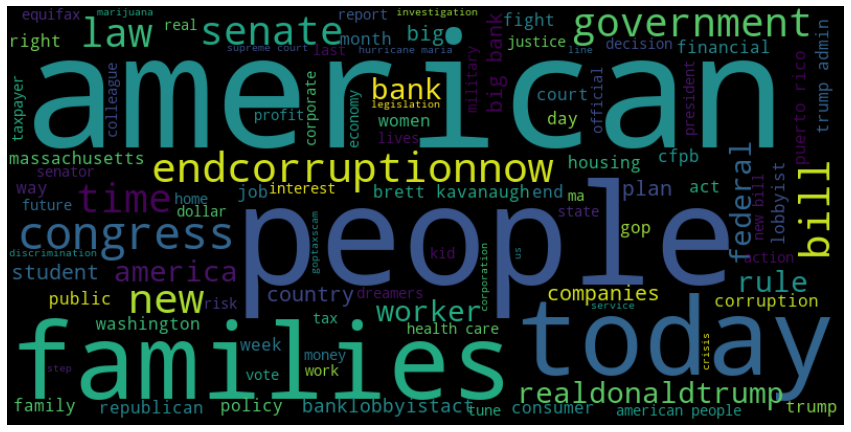

In [0]:
# Warren's Word Cloud

# Create a single space-separated string of all of the keywords across all of the tweets
# analyzed in the sentiment analysis. Ignore the word amp, since it is just means ampersand
# and provides no meaning
keyword_string = ' '.join([keyword['text'].lower() 
                           for score in warren_senti_scores.values() 
                           for keyword in score['keywords'] 
                           if keyword['text'].lower() != 'amp'])

wordcloud = WordCloud(max_words=100, scale=2).generate(keyword_string)
plt.figure(figsize=[15,15])
plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

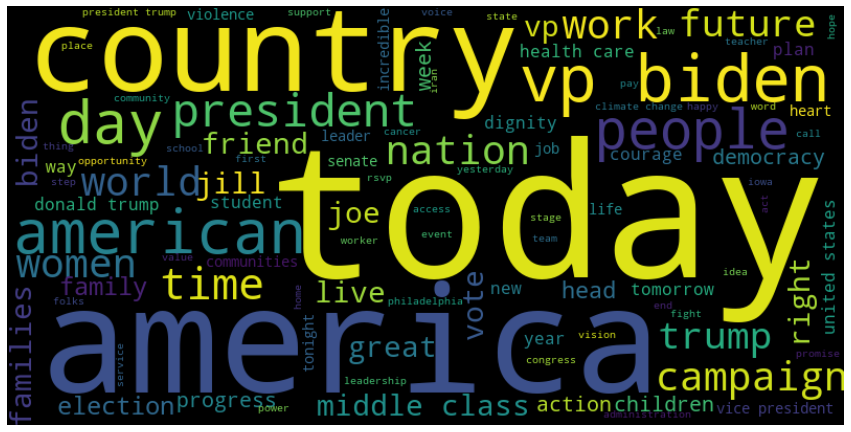

In [0]:
# Biden's Word Cloud

# Create a single space-separated string of all of the keywords across all of the tweets
# analyzed in the sentiment analysis. Ignore the word amp, since it is just means ampersand
# and provides no meaning
keyword_string = ' '.join([keyword['text'].lower() 
                           for score in biden_senti_scores.values() 
                           for keyword in score['keywords'] 
                           if keyword['text'].lower() != 'amp'])

wordcloud = WordCloud(max_words=100, scale=2).generate(keyword_string)
plt.figure(figsize=[15,15])
plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

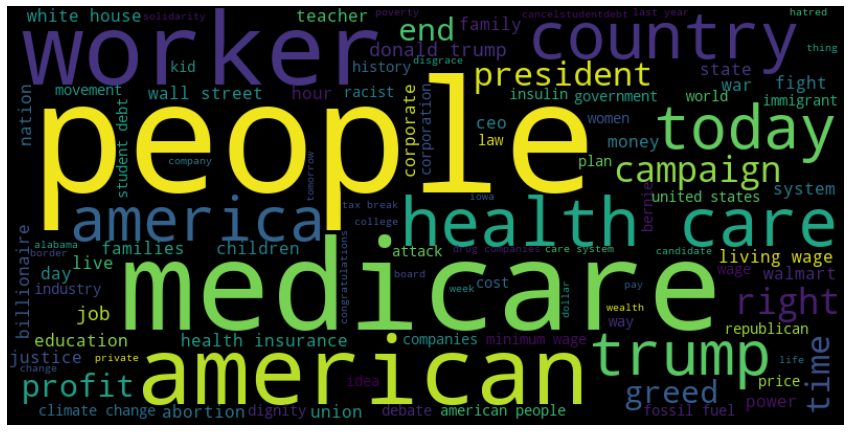

In [0]:
# Bernie's Word Cloud

# Create a single space-separated string of all of the keywords across all of the tweets
# analyzed in the sentiment analysis. Ignore the word amp, since it is just means ampersand
# and provides no meaning
keyword_string = ' '.join([keyword['text'].lower() 
                           for score in bernie_senti_scores.values() 
                           for keyword in score['keywords'] 
                           if keyword['text'].lower() != 'amp'])

wordcloud = WordCloud(max_words=100, scale=2).generate(keyword_string)
plt.figure(figsize=[15,15])
plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

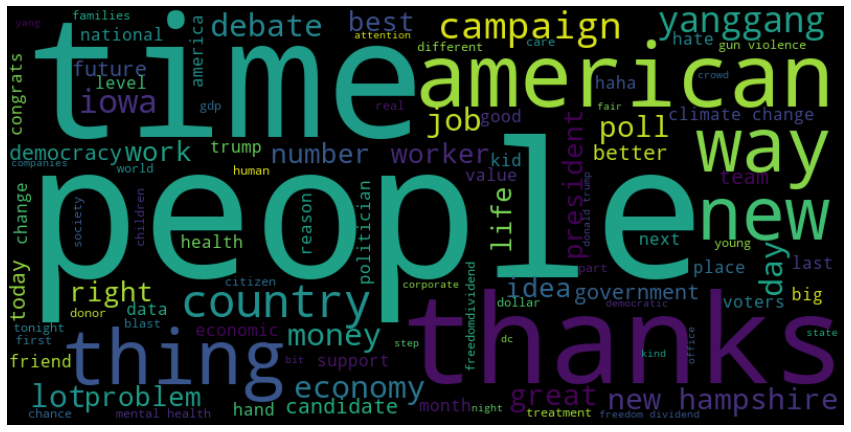

In [0]:
# Yang's Word Cloud

# Create a single space-separated string of all of the keywords across all of the tweets
# analyzed in the sentiment analysis. Ignore the word amp, since it is just means ampersand
# and provides no meaning
keyword_string = ' '.join([keyword['text'].lower() 
                           for score in yang_senti_scores.values() 
                           for keyword in score['keywords'] 
                           if keyword['text'].lower() != 'amp'])

wordcloud = WordCloud(max_words=100, scale=2).generate(keyword_string)
plt.figure(figsize=[15,15])
plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()